In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network._base import ACTIVATIONS
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles

In [ ]:
#We are starting with one thousand examples/data points/observations/entities/records/tuples/samples/instances/rows in a 2-d space (2 features/attributes/variables/covariats/columns)
X, y = make_circles(n_samples=1000, noise=.1, factor=.2, random_state=1)

In [ ]:
#Train-test split (75% of data will be a train set and the rest in a test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
...                                                     random_state=1)

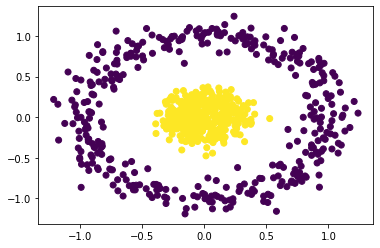

In [ ]:
#This is the train set. Yellow dots are examples of one class, and purple ones are of the other.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

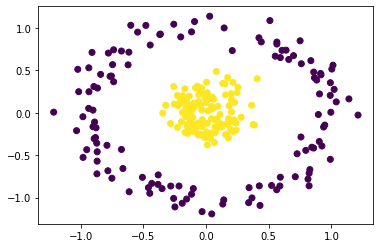

In [ ]:
#This is a test set. Colors represent the same thing as in the train set
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test);

In [ ]:
#We will create one non-linear and one linear classifier, Multilayer Perceptron and Logistic Regression, respectively
mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(4, 2), max_iter=500).fit(X_train, y_train)
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#This is a three layer (with 4 nodes in the first hidden layer and 2 nodes in the second one) MLP which can learn a non-linear classification boundary so result is almost perfect
print(mlp.score(X_test, y_test))

#Logistic regression is a linear classifer so result is bad (accuracy is cca 50%)
print(logreg.score(X_test, y_test))

0.996
0.484


In [ ]:
def rectified(x):
  return np.maximum(0.0, x)

In [ ]:
#Fetching the output of the last hidden layer from our MLP (neural network). That will be the new representation of our data (hence the name of this document, Representation Learning)
def fetch_last_hidden_layer(clf, data):
  last_hidden_index = len(clf.coefs_) - 1
  A = data
  for i in range(last_hidden_index):
    A = rectified(A@clf.coefs_[i] + clf.intercepts_[i])
  return A

In [ ]:
last_hidden_layer_train = fetch_last_hidden_layer(mlp, X_train)
last_hidden_layer_test = fetch_last_hidden_layer(mlp, X_test)

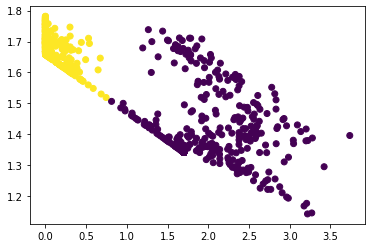

In [ ]:
#This is a new 2-d space in which our original space was transformed. We can see that in this space our data points are almost perfectly linearly separable. This is a power of neural networks in general.
#They are trying to find a new representation of original data (an original space) where data points are linearly separable because the last layer is inherently a linear classifier
#We can prove that by applying logistic regresion on this new data (dataset). We'll get the same result as with the previous MLP classifier
plt.scatter(last_hidden_layer_train[:, 0], last_hidden_layer_train[:, 1], c=y_train);

In [ ]:
#Result is the same
logreg_feature_space = LogisticRegression(random_state=0).fit(last_hidden_layer_train, y_train)
print(logreg_feature_space.score(last_hidden_layer_test, y_test))

0.996


In [ ]:
def plot_mlp(X, y, h):

  r = .04
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
  XX = np.c_[xx.ravel(), yy.ravel()]
  Z_test = h(XX)
  Z_test = Z_test[:, 1]
  Z = Z_test.reshape(xx.shape)
  return xx, yy, Z

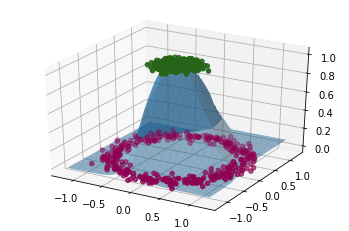

In [ ]:
#We can also plot a function that our MLP learns and plot it in a 3-d space along with our data points (in this example from the train set). The purple points belong to the class 0 and the green ones belong to class 1
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train, c=y_train, cmap='PiYG')
x, y, z = plot_mlp(X_train, y_train, mlp.predict_proba)
ax.plot_surface(x, y, z, alpha=.5)
plt.show()